# LineRegression
#### by Joshua Rodriguez

##### 1. Choose a data from https://archive.ics.uci.edu
##### 2. Perform regression analysis on your chosen dataset

In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
# Define the column names manually based on the machine.names file
column_names = [
    "vendor_name", "model_name", "MYCT", "MMIN", "MMAX", 
    "CACH", "CHMIN", "CHMAX", "PRP", "ERP"
]
data = pd.read_csv('machine.data', names=column_names, na_values='?')

data = data.drop(columns=["vendor_name", "model_name", "ERP"])
print(data.isnull().sum())
data = data.dropna()
data.head()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
dtype: int64


MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0   125   256   6000   256     16    128  198
1    29  8000  32000    32      8     32  269
2    29  8000  32000    32      8     32  220
3    29  8000  32000    32      8     32  172
4    29  8000  16000    32      8     16  132

In [3]:
X = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
y = data["PRP"]

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


(209, 6)
(209,)
Mean Squared Error: 5633.06815579327
R^2 Score: 0.8893455830696771
       Coefficient
MYCT      0.042756
MMIN      0.011096
MMAX      0.005968
CACH      0.621287
CHMIN     0.411682
CHMAX     1.382874


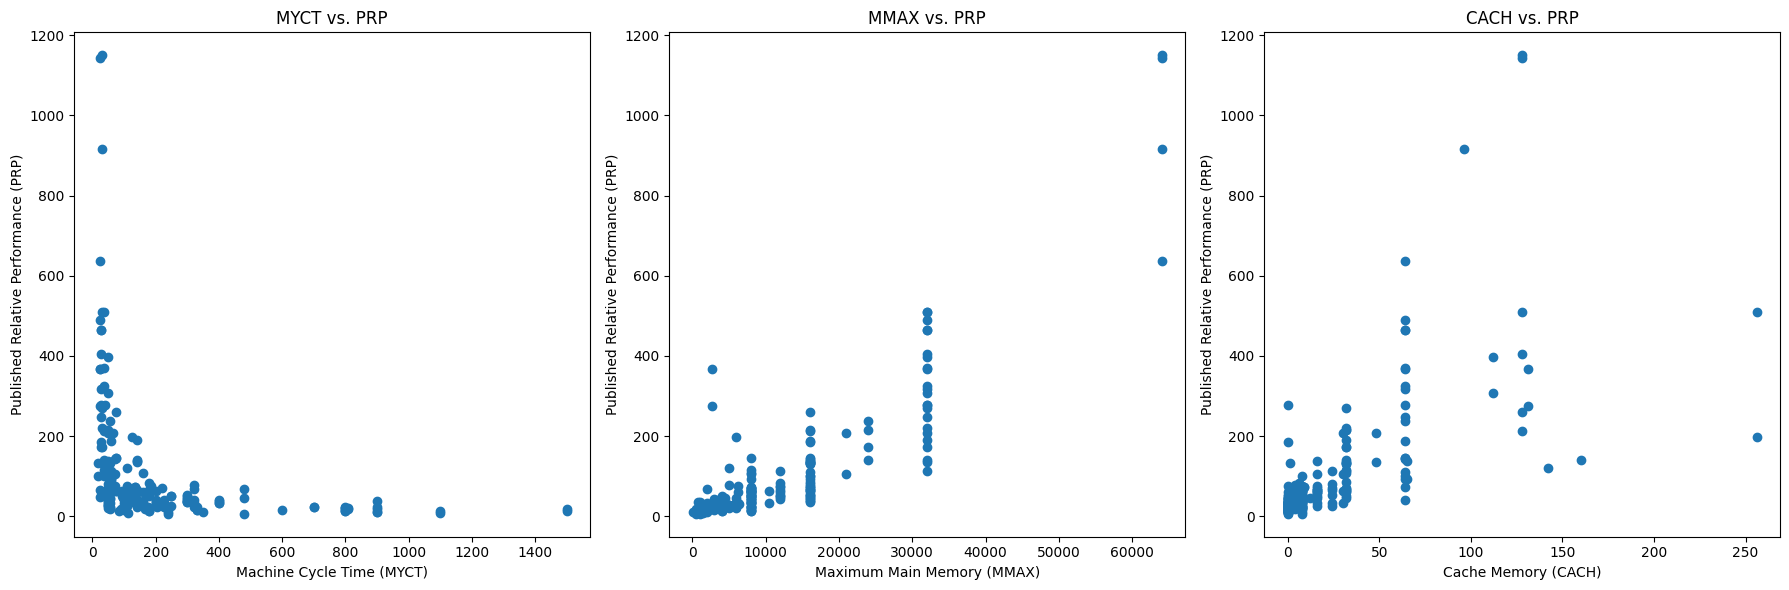

In [4]:
# Create subplots comparing different features with PRP
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Subplot 1: MYCT vs. PRP
axes[0].plot(data['MYCT'], data['PRP'], 'o')
axes[0].set_ylabel("Published Relative Performance (PRP)")
axes[0].set_xlabel("Machine Cycle Time (MYCT)")
axes[0].set_title("MYCT vs. PRP")

# Subplot 2: MMAX vs. PRP
axes[1].plot(data['MMAX'], data['PRP'], 'o')
axes[1].set_ylabel("Published Relative Performance (PRP)")
axes[1].set_xlabel("Maximum Main Memory (MMAX)")
axes[1].set_title("MMAX vs. PRP")

# Subplot 3: CACH vs. PRP
axes[2].plot(data['CACH'], data['PRP'], 'o')
axes[2].set_ylabel("Published Relative Performance (PRP)")
axes[2].set_xlabel("Cache Memory (CACH)")
axes[2].set_title("CACH vs. PRP")

plt.tight_layout()
plt.show()

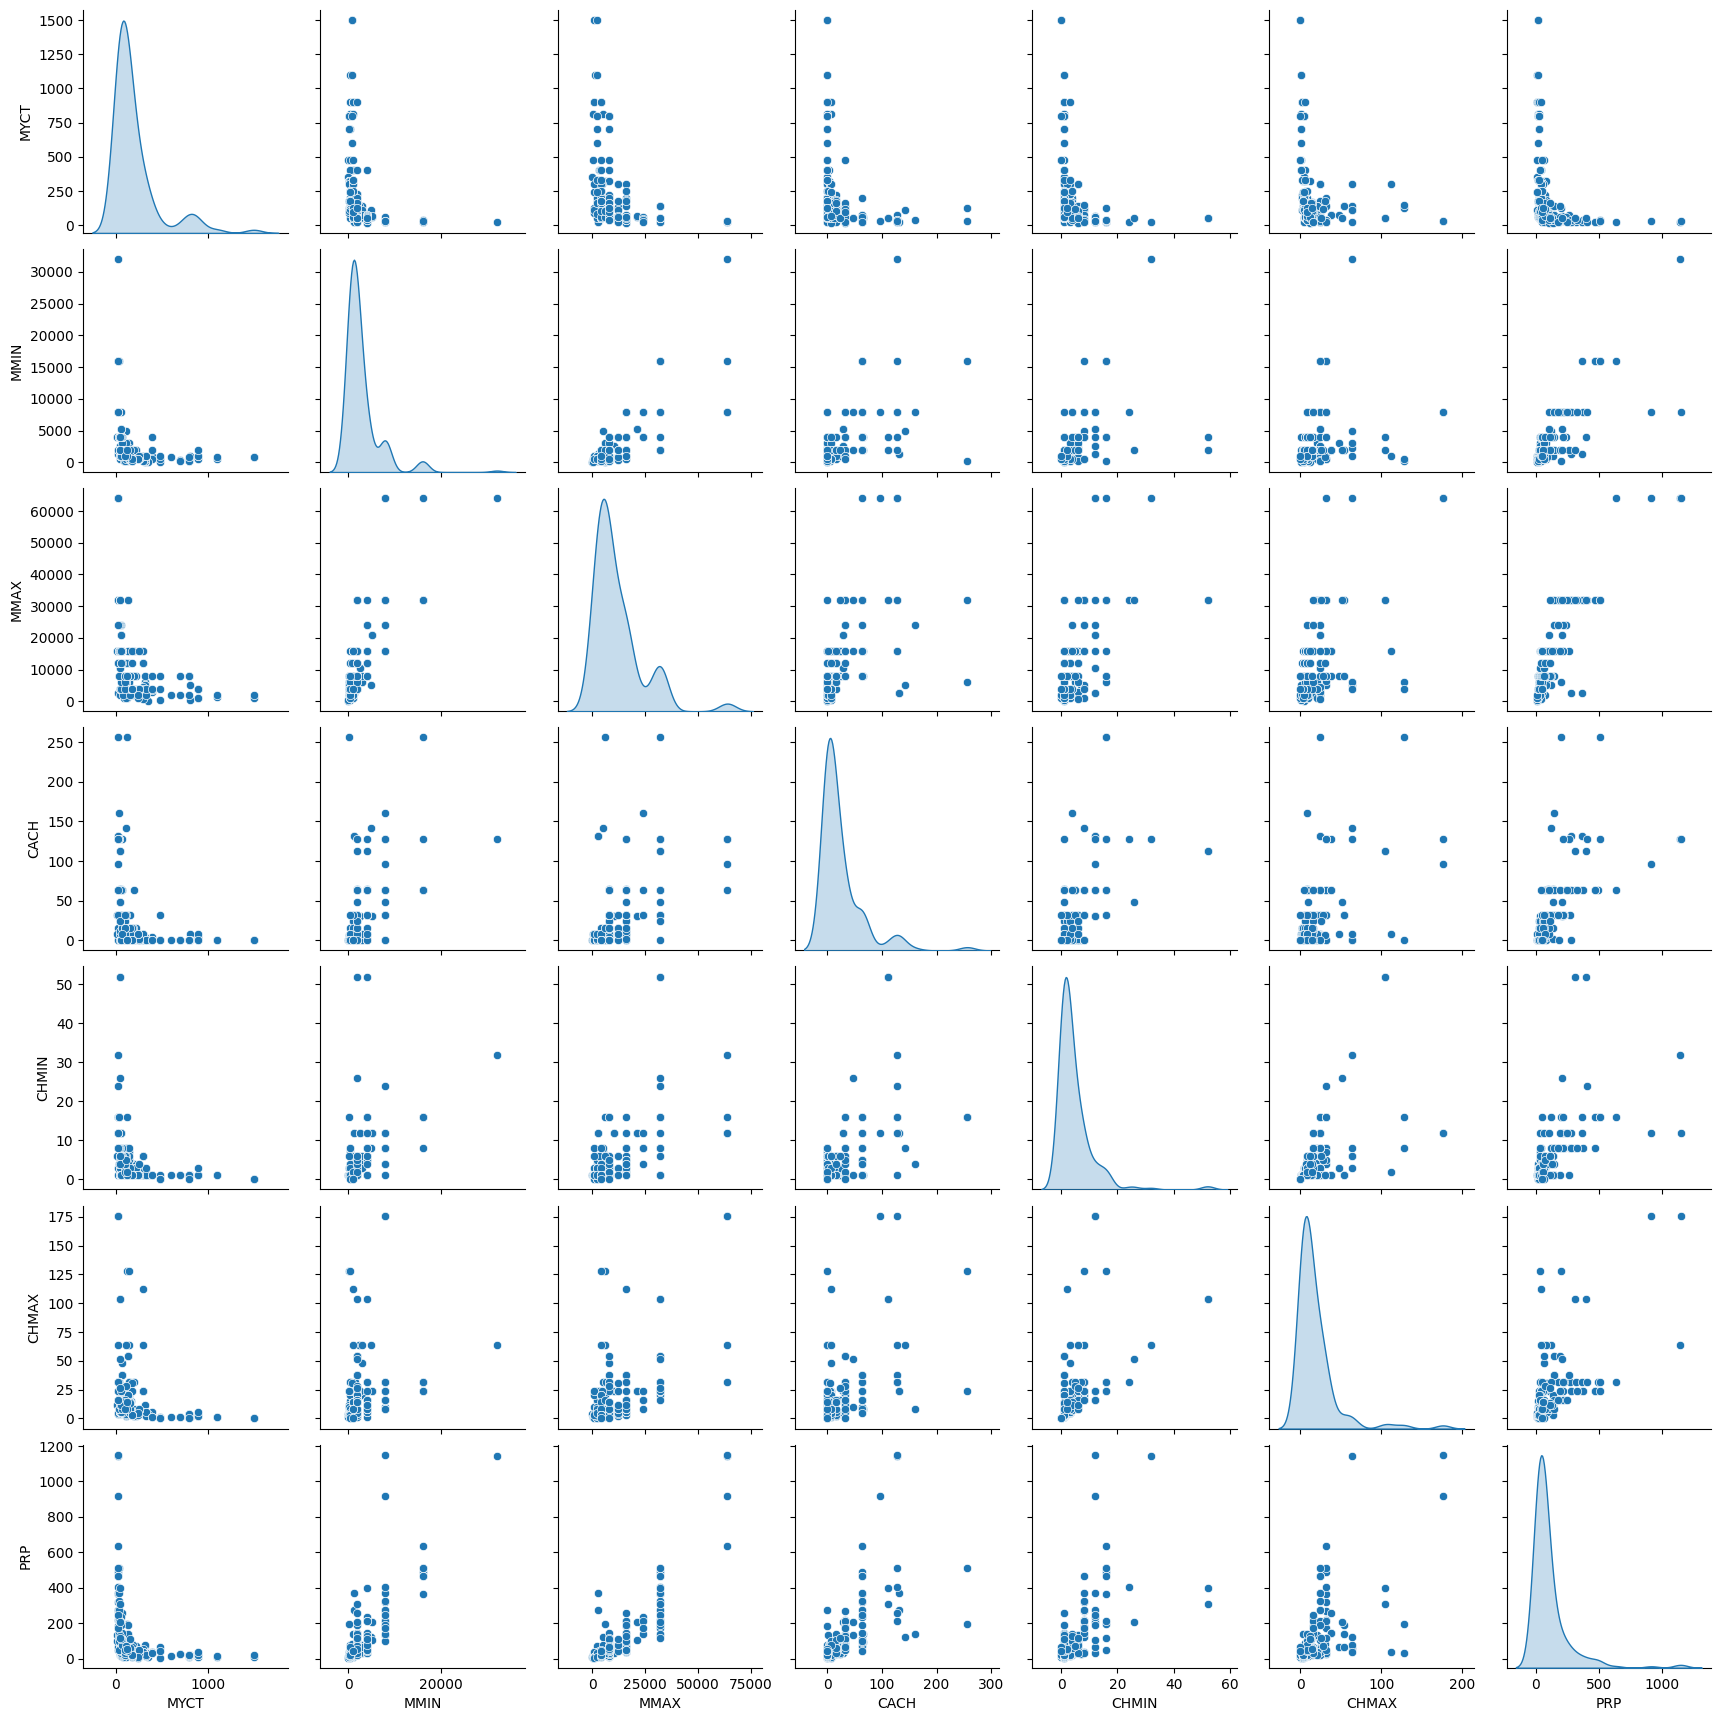

In [5]:
# Define the columns to include in the pairplot
columns_to_include = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']

# Create the pairplot with the specified columns and suppress the warning
with sns.plotting_context(font_scale=1.5):
    sns.pairplot(data[columns_to_include], diag_kind='kde')

# Show the pairplot
plt.show()

#### Train | Test Split

In [7]:
X = data[['MMAX', 'MYCT', 'CACH']]
y = data['PRP']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_train

MMAX  MYCT  CACH
104   2000   600     0
141   8000    92    32
4    16000    29    32
74    3000   300     6
136  16000    50    24
..     ...   ...   ...
67    2000   105     0
192  32000    26   128
117   4000   225     2
47    5000   810     0
172   8000   200    64

[167 rows x 3 columns]

In [12]:
y_train

104     16
141     60
4      132
74      44
136     65
      ... 
67      26
192    405
117     24
47      20
172     41
Name: PRP, Length: 167, dtype: int64

In [13]:
X_test

MMAX  MYCT  CACH
12    8000    60    65
80    3000   330     0
33   10480    50    30
5    32000    26    64
187  12000    70     8
83    2000   330     0
116  16000   180    16
122   1000  1500     0
90   32000   140    32
154  24000    48    32
45    8000   133     9
156  32000    30   256
52   16000   140    16
189  16000    59    64
96   32000    26    64
86    4000   140     0
205   8000    98    32
37    4000    50     8
66    1000    90     0
18    2000   143     0
170   2000   200     0
15   16000   200     0
7    32000    23    64
55   12000   110    16
92    4000   140     8
134  16000    50    12
125   4000    50     0
124   2000   800     0
158   2000    84     0
184   6000   105    16
75   12000   300     6
149   8000    72    16
138   8000   115    16
71    8000    75     8
186  16000    52    32
145  16000    60    64
176   4000   160     2
118  12000    25     8
16    2000   167     8
135  16000    50    24
190  24000    26    32
22    6200   143     0

In [14]:
y_test

12      92
80      16
33      63
5      318
187     75
83      16
116     66
122     12
90     141
154    214
45      72
156    510
52     138
189    188
96     465
86      40
205     46
37      29
66      17
18      31
170     25
15      35
7      489
55      60
92      22
134     45
125     27
124     20
158     12
184     33
75      50
149    105
138     50
71      64
186    130
145     74
176     30
118     49
16      19
135     54
190    173
22      61
Name: PRP, dtype: int64

In [15]:
model = LinearRegression()

In [16]:
X_train

MMAX  MYCT  CACH
104   2000   600     0
141   8000    92    32
4    16000    29    32
74    3000   300     6
136  16000    50    24
..     ...   ...   ...
67    2000   105     0
192  32000    26   128
117   4000   225     2
47    5000   810     0
172   8000   200    64

[167 rows x 3 columns]

#### Creating a Model and Train

In [17]:
model.fit(X_train, y_train)

LinearRegression()

## LinearRegression()
##### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

#### Calculate Performance on Test Set

In [20]:
test_predictions = model.predict(X_test)
test_predictions

array([107.89697516,  -8.5843775 ,  91.6429583 , 352.2732734 ,
        82.17202383, -18.87769938, 137.59083266,  21.83154569,
       319.44112159, 233.08408829,  44.9263294 , 579.2574373 ,
       135.84715516, 189.01865725, 352.2732734 ,  -6.57352376,
        70.57053508,  -1.04638997, -39.63308628, -27.02939171,
       -24.54465127, 119.56185506, 352.14249759,  93.36610951,
         2.87688441, 127.19867669, -10.49679814,   1.61051127,
       -29.60131602,  31.38821853,  89.83556743,  50.53632835,
        52.41078167,  41.21669599, 150.911881  , 189.06224919,
        -3.33908296,  80.21038664, -16.53277703, 141.37428895,
       232.12506566,  16.20256019])

In [25]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

45.33511785879853

In [26]:
MSE = mean_squared_error(y_test,test_predictions)
MSE

3460.2000060979385

In [29]:
RMSE = np.sqrt(MSE)
RMSE

58.8234647576793

In [31]:
data['PRP'].mean()

105.622009569378

In [32]:
test_predictions = model.predict(X_test)
test_res = y_test - test_predictions

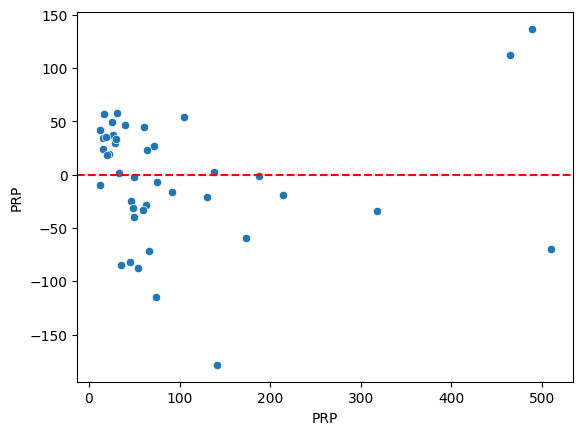

In [33]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [34]:
len(test_res)

42

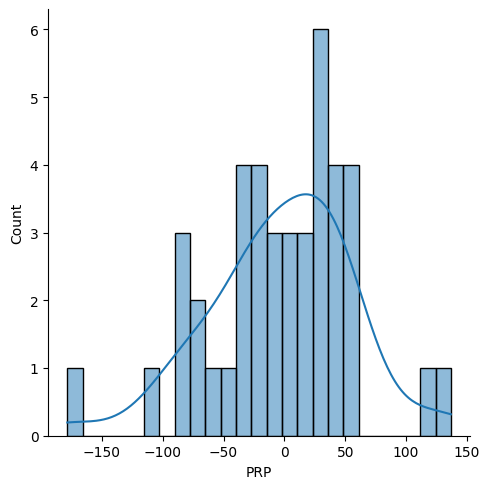

In [35]:
sns.displot(test_res,bins=25,kde=True)

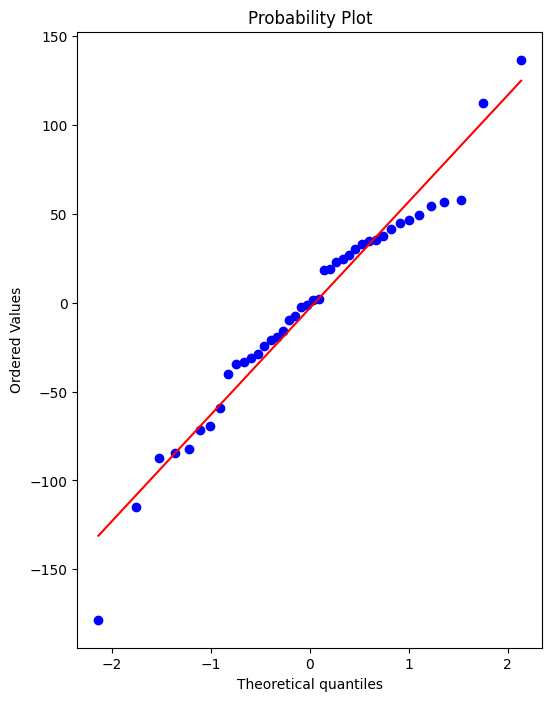

In [36]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_res,plot=ax)

In [37]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

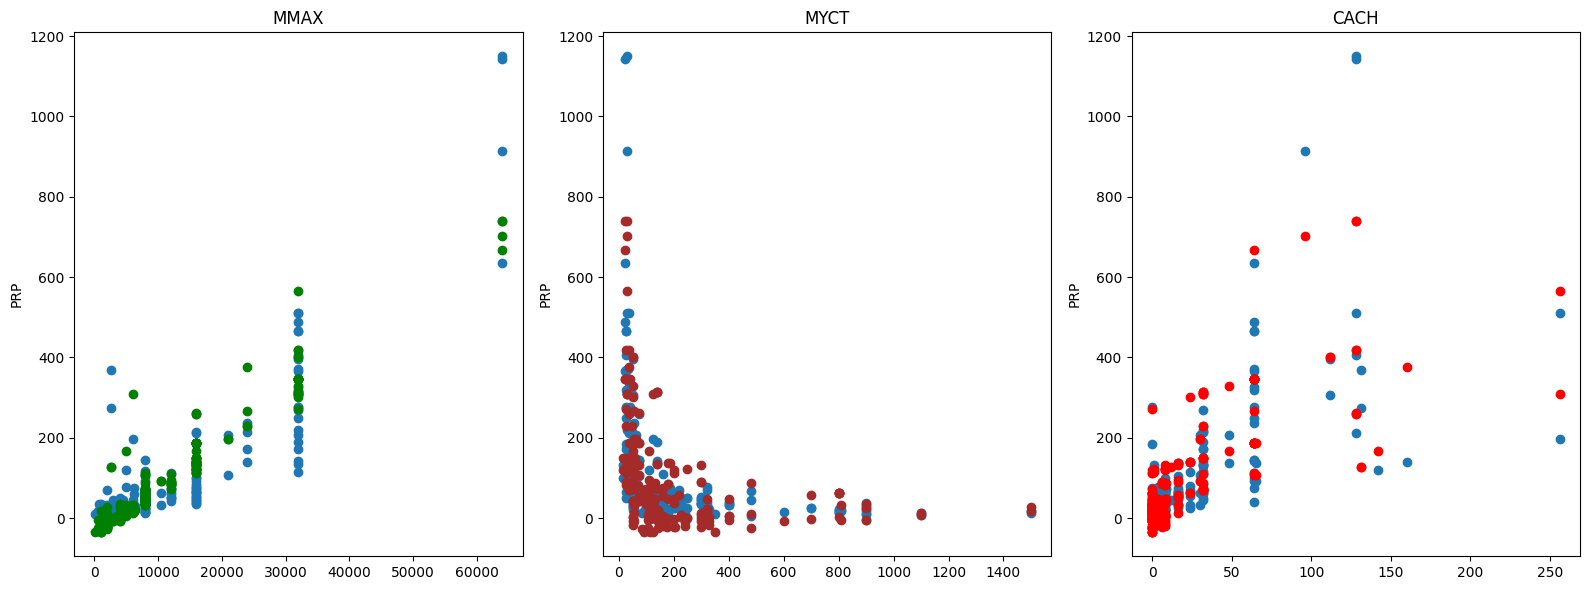

In [39]:
y_hat = final_model.predict(X)

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(data['MMAX'],data['PRP'],'o')
axes[0].plot(data['MMAX'],y_hat,'o',color='green')
axes[0].set_ylabel("PRP")
axes[0].set_title("MMAX")

axes[1].plot(data['MYCT'],data['PRP'],'o')
axes[1].plot(data['MYCT'],y_hat,'o',color='brown')
axes[1].set_title("MYCT")
axes[1].set_ylabel("PRP")

axes[2].plot(data['CACH'],data['PRP'],'o')
axes[2].plot(data['CACH'],y_hat,'o',color='red')
axes[2].set_title("CACH");
axes[2].set_ylabel("PRP")
plt.tight_layout();

In [40]:
residuals = y_hat - y

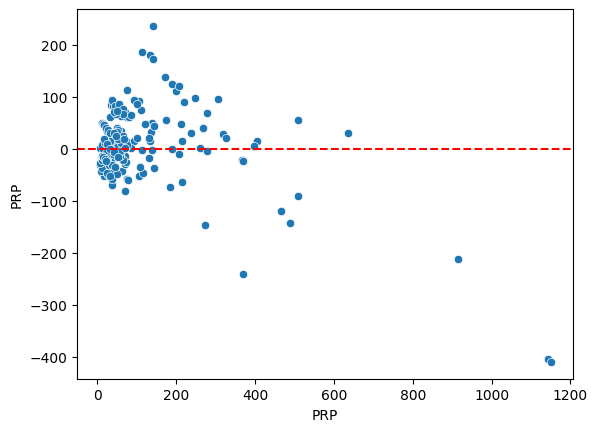

In [41]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [42]:
final_model.coef_

array([0.0100249 , 0.03863878, 1.14589727])

In [43]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
MMAX     0.010025
MYCT     0.038639
CACH     1.145897

**1.MMAX (Maximum Main Memory): The coefficient value for MMAX is 0.010025. This means that for every one-unit increase in the maximum main memory (in kilobytes), the predicted target variable (PRP) increases by approximately 0.010025 units, holding all other features constant. So, as the maximum main memory of the CPU increases, the predicted performance (PRP) also increases, assuming all other factors remain constant.** <br>

**MYCT (Machine Cycle Time): The coefficient value for MYCT is 0.038639. This means that for every one-unit increase in the machine cycle time (in nanoseconds), the predicted target variable (PRP) increases by approximately 0.038639 units, holding all other features constant. So, as the machine cycle time increases, the predicted performance (PRP) also increases, assuming all other factors remain constant.** <br>

**CACH (Cache Memory): The coefficient value for CACH is 1.145897. This means that for every one-unit increase in cache memory (in kilobytes), the predicted target variable (PRP) increases by approximately 1.145897 units, holding all other features constant. So, as the cache memory increases, the predicted performance (PRP) also increases, assuming all other factors remain constant.** <br>